In [1]:
%cd /kaggle/working
import pandas as pd
import polars as pl

/kaggle/working


In [2]:
test_df = pl.read_csv("input/leap-atmospheric-physics-ai-climsim/test.csv")
test_old_df = pl.read_csv("input/leap-atmospheric-physics-ai-climsim/test_old.csv")

In [6]:
tmp = test_df[:, 1::10].with_row_index("index")
tmp_old = test_old_df[:, 1::10].with_row_index("old_index")

In [12]:
merge_df = pd.merge(tmp.to_pandas().round(5), tmp_old.to_pandas().round(5))

In [15]:
sorted(merge_df["old_index"])[:384]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
sorted(merge_df["old_index"])[::384]

[0,
 1536,
 3072,
 4608,
 6144,
 7680,
 9216,
 10752,
 12288,
 13824,
 15360,
 16896,
 18432,
 19968,
 21504,
 23040,
 24576,
 26112,
 27648,
 29184,
 30720,
 32256,
 33792,
 35328,
 36864,
 38400,
 39936,
 41472,
 43008,
 44544,
 46080,
 47616,
 49152,
 50688,
 52224,
 53760,
 55296,
 56832,
 58368,
 59904,
 61440,
 62976,
 64512,
 66048,
 67584,
 69120,
 70656,
 72192,
 73728,
 75264,
 76800,
 78336,
 79872,
 81408,
 82944,
 84480,
 86016,
 87552,
 89088,
 90624,
 92160,
 93696,
 95232,
 96768,
 98304,
 99840,
 101376,
 102912,
 104448,
 105984,
 107520,
 109056,
 110592,
 112128,
 113664,
 115200,
 116736,
 118272,
 119808,
 121344,
 122880,
 124416,
 125952,
 127488,
 129024,
 130560,
 132096,
 133632,
 135168,
 136704,
 138240,
 139776,
 141312,
 142848,
 144384,
 145920,
 147456,
 148992,
 150528,
 152064,
 153600,
 155136,
 156672,
 158208,
 159744,
 161280,
 162816,
 164352,
 165888,
 167424,
 168960,
 170496,
 172032,
 173568,
 175104,
 176640,
 178176,
 179712,
 181248,
 1827

In [16]:
merge_df["old_index"]

0         420941
1         460907
2         367404
3         253763
4         352008
           ...  
125179    376435
125180    313571
125181     46250
125182    304386
125183      1715
Name: old_index, Length: 125184, dtype: uint32

## 8時間おきなのかを確認

1. trainデータを見て、locationごとに0時、8時、16時のいつ夜になるのかをチェック
2. 1.のうち、3つの時間のすべてで昼と夜が完全に分かれているlocationだけを抜き出す（「8時は季節によって朝になることもあれば夜になることもある」みたいな地点を排除）
3. testデータの同じlocationを抜き出して、夜の数が想定と一致するか検証

In [32]:
for i in range(73):
    print(i, (20 * 7 * i / 60) % 24)

0 0.0
1 2.3333333333333335
2 4.666666666666667
3 7.0
4 9.333333333333334
5 11.666666666666666
6 14.0
7 16.333333333333332
8 18.666666666666668
9 21.0
10 23.333333333333332
11 1.6666666666666679
12 4.0
13 6.333333333333332
14 8.666666666666664
15 11.0
16 13.333333333333336
17 15.666666666666664
18 18.0
19 20.333333333333336
20 22.666666666666664
21 1.0
22 3.3333333333333357
23 5.666666666666664
24 8.0
25 10.333333333333336
26 12.666666666666664
27 15.0
28 17.33333333333333
29 19.66666666666667
30 22.0
31 0.3333333333333286
32 2.6666666666666714
33 5.0
34 7.333333333333329
35 9.666666666666671
36 12.0
37 14.333333333333329
38 16.66666666666667
39 19.0
40 21.33333333333333
41 23.66666666666667
42 2.0
43 4.333333333333329
44 6.666666666666671
45 9.0
46 11.333333333333329
47 13.666666666666671
48 16.0
49 18.33333333333333
50 20.66666666666667
51 23.0
52 1.3333333333333286
53 3.6666666666666714
54 6.0
55 8.333333333333343
56 10.666666666666657
57 13.0
58 15.333333333333343
59 17.666666666666

In [56]:
625000 // 384 * 1/3

542.3333333333334

In [57]:
542.3333333333334 * 24 * 60 // (20*7) * 384 

2141952.0

In [58]:
train_df = pl.read_parquet(
    "input/train.parquet", n_rows=2141952
)  # 542.3333333333334 * 24h * 60min/h // (20*7)file/min * 384 location/file = 2141952行

In [63]:
tmp = train_df["cam_in_LANDFRAC"].to_pandas().value_counts()
print(tmp)
ratios = tmp[tmp == 5578].index

cam_in_LANDFRAC
0.000000    964994
1.000000    267744
0.561390      5578
0.455855      5578
0.984896      5578
             ...  
0.246043      5578
0.876405      5578
0.338982      5578
0.495054      5578
0.572225      5578
Name: count, Length: 165, dtype: int64


In [65]:
def check_test_ratio(ratio):
    tmp = test_df.filter(pl.col("cam_in_LANDFRAC").round(6) == round(ratio, 6))
    return (tmp["pbuf_COSZRS"] == 0).mean()


for ratio in ratios:
    tmp = train_df.filter(pl.col("cam_in_LANDFRAC") == ratio)
    time0_night_rate = (tmp[::72]["pbuf_COSZRS"] == 0).mean()  # 0時のnight rate
    time8_night_rate = (tmp[24::72]["pbuf_COSZRS"] == 0).mean()
    time16_night_rate = (tmp[48::72]["pbuf_COSZRS"] == 0).mean()

    print(
        f"{ tmp[0, 0]}, train_night_rate:{(time0_night_rate + time8_night_rate + time16_night_rate) / 3}, new_test_night_rate:{check_test_ratio(ratio)}"
    )
    #print(time0_night_rate, time8_night_rate, time16_night_rate)

train_280, train_night_rate:0.5673770673770674, new_test_night_rate:0.5986478180700676
train_281, train_night_rate:0.5637695637695638, new_test_night_rate:0.5875845113706207
train_283, train_night_rate:0.571983571983572, new_test_night_rate:0.6097111247695144
train_286, train_night_rate:0.5256410256410257, new_test_night_rate:0.5439459127228027
train_288, train_night_rate:0.5555555555555555, new_test_night_rate:0.5716041794714198
train_290, train_night_rate:0.6111111111111112, new_test_night_rate:0.6152427781192379
train_291, train_night_rate:0.5427350427350427, new_test_night_rate:0.5543945912722803
train_292, train_night_rate:0.5653790653790653, new_test_night_rate:0.6004917025199754
train_279, train_night_rate:0.5791985791985792, new_test_night_rate:0.6306084818684696
train_294, train_night_rate:0.5218115218115219, new_test_night_rate:0.5519360786724032
train_295, train_night_rate:0.5742590742590743, new_test_night_rate:0.6078672403196066
train_297, train_night_rate:0.57592407592407

KeyboardInterrupt: 

## 24周期なのか確認

In [17]:
test_df["cam_in_LANDFRAC"].to_pandas().value_counts()

cam_in_LANDFRAC
0.000000    281594
1.000000     78125
0.124711      1628
0.572225      1628
0.789360      1628
             ...  
0.001166      1627
0.995994      1627
0.268941      1627
0.130754      1627
0.326291      1627
Name: count, Length: 165, dtype: int64

In [69]:
tmp = test_df.filter(pl.col("cam_in_LANDFRAC").round(6) == 0.789360)
tmp

sample_id,state_t_0,state_t_1,state_t_2,state_t_3,state_t_4,state_t_5,state_t_6,state_t_7,state_t_8,state_t_9,state_t_10,state_t_11,state_t_12,state_t_13,state_t_14,state_t_15,state_t_16,state_t_17,state_t_18,state_t_19,state_t_20,state_t_21,state_t_22,state_t_23,state_t_24,state_t_25,state_t_26,state_t_27,state_t_28,state_t_29,state_t_30,state_t_31,state_t_32,state_t_33,state_t_34,state_t_35,…,pbuf_N2O_23,pbuf_N2O_24,pbuf_N2O_25,pbuf_N2O_26,pbuf_N2O_27,pbuf_N2O_28,pbuf_N2O_29,pbuf_N2O_30,pbuf_N2O_31,pbuf_N2O_32,pbuf_N2O_33,pbuf_N2O_34,pbuf_N2O_35,pbuf_N2O_36,pbuf_N2O_37,pbuf_N2O_38,pbuf_N2O_39,pbuf_N2O_40,pbuf_N2O_41,pbuf_N2O_42,pbuf_N2O_43,pbuf_N2O_44,pbuf_N2O_45,pbuf_N2O_46,pbuf_N2O_47,pbuf_N2O_48,pbuf_N2O_49,pbuf_N2O_50,pbuf_N2O_51,pbuf_N2O_52,pbuf_N2O_53,pbuf_N2O_54,pbuf_N2O_55,pbuf_N2O_56,pbuf_N2O_57,pbuf_N2O_58,pbuf_N2O_59
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""test_100498""",212.684374,217.504365,228.434493,244.219916,255.182302,260.810624,259.222102,251.586806,240.412289,232.225242,225.912776,221.533065,217.518205,214.305555,210.639211,205.979784,200.027664,195.202577,195.036151,197.471649,202.520169,207.380708,212.010117,216.217547,220.228639,224.124852,228.158464,232.062637,235.779435,239.457766,243.124483,246.80591,250.55302,254.168042,257.593244,260.820063,…,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7
"""test_100858""",209.752486,214.337276,230.648398,243.620316,256.732559,263.95655,262.933607,254.072266,241.854733,233.846491,227.551694,222.767038,218.30272,214.707683,210.880362,207.0189,203.005835,200.364224,198.350243,199.201824,200.906386,205.135447,209.04217,213.623303,218.206796,222.565185,226.681188,230.590766,234.284341,237.831853,241.416864,245.050147,248.683731,252.24089,255.771207,259.069286,…,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7
"""test_10096""",214.206692,231.10129,229.53368,238.268186,252.51279,261.480306,261.7538,254.035541,242.536887,234.610789,228.584967,224.152659,219.446411,214.723931,209.48311,204.221415,198.709594,195.340674,195.000068,197.060802,201.433588,206.077122,210.687328,215.175244,219.503224,223.843014,228.138496,232.266107,236.450572,240.603807,244.486264,248.04497,251.502883,254.818499,258.113019,261.227645,…,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7
"""test_101212""",203.042319,223.222455,218.429617,230.88483,249.000317,256.904977,251.787959,243.538292,235.408268,229.275547,223.900652,218.783959,214.516993,211.146157,207.522404,203.241445,198.948931,194.720235,194.103473,197.056015,203.604946,210.420885,217.10565,223.867142,230.30362,236.117182,241.530707,245.940488,249.016486,251.087744,252.878366,254.550833,256.001987,257.536319,259.634397,262.192983,…,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.9086e-7,4.908

In [70]:
(tmp["pbuf_SOLIN"] == 0).sum()

542

In [67]:
1_628 // 3

542

<Axes: >

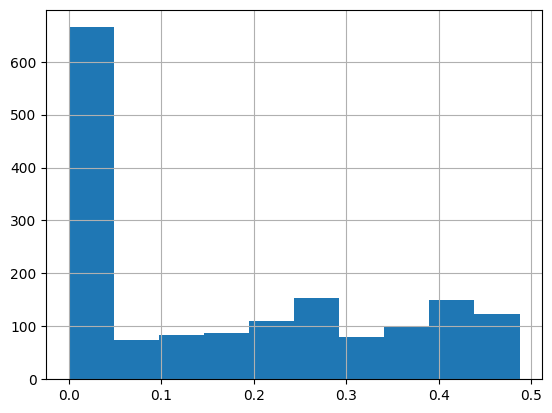

In [68]:
tmp["pbuf_COSZRS"].to_pandas().hist()